In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
from tqdm import tqdm
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
from nltk.stem.wordnet import WordNetLemmatizer


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from imblearn.over_sampling import SMOTE



In [116]:
pip install imbalanced-learn


  Using cached imbalanced_learn-0.12.3-py3-none-any.whl (258 kB)
Note: you may need to restart the kernel to use updated packages.



The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/win-64::aiohttp==3.8.1=py39h2bbff1b_1
  - defaults/win-64::anaconda-client==1.9.0=py39haa95532_0
  - defaults/win-64::anaconda==custom=py39_2
  - defaults/win-64::anaconda-navigator==2.1.4=py39haa95532_0
  - defaults/noarch::anaconda-project==0.10.2=pyhd3eb1b0_0
  - defaults/noarch::argon2-cffi==21.3.0=pyhd3eb1b0_0
  - defaults/noarch::arrow==1.2.2=pyhd3eb1b0_0
  - defaults/noarch::async-timeout==4.0.1=pyhd3eb1b0_0
  - defaults/noarch::babel==2.9.1=pyhd3eb1b0_0
  - defaults/win-64::bkcharts==0.2=py39haa95532_0
  - defaults/noarch::black==19.10b0=py_0
  - defaults/win-64::bokeh==2.4.2=py39haa95532_0
  - defaults/noarch::colorcet==2.0.6=pyhd3eb1b0_0
  - conda-forge/win-64::conda==4.14.0=py39hcbf5309_0
  - defaults/win-64::conda-build==3.21.8=py39haa95532_2
  - defaults/noarch::conda-repo-cli==1.0.4=pyhd3eb1b0_0
  - defaults/noarch::conda-token==0.3

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... done
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\shri\anaconda3

  added / updated specs:
    - imbalanced-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2024.8.30  |       h56e8100_0         155 KB  conda-forge
    certifi-2024.8.30          |     pyhd8ed1ab_0         160 KB  conda-forge
    conda-build-3.24.0         |   py39hcbf5309_1         553 KB  conda-forge
    imbalanced-learn-0.12.3    |     pyhd8ed1ab_0         155 KB  conda-forge
    lxml-4.8.0                 |   py39hb82d6ee_2         1.1 MB  conda-forge
    m2-msys2-runtime-2.5.0.17080.65c939c|                3         3.0 MB  conda-forge
    m2-patch-2.7.5             |                2          90 KB  conda-forge
  

In [86]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
train_data = pd.read_csv("C://Users//shri//Data_Science//Prodigy_Internship//Prodigy_DS_04//archive//twitter_training.csv")

In [88]:
train_data.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [89]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   74681 non-null  int64 
 1   Borderlands                                            74681 non-null  object
 2   Positive                                               74681 non-null  object
 3   im getting on borderlands and i will murder you all ,  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [90]:
train_data.shape

(74681, 4)

Let's first rename the columns of the datasets

In [5]:
# Rename the columns based on the observed pattern
train_data.columns = ['ID', 'Topic', 'Sentiment', 'Text']
# Preview the updated dataset
train_data.head()

,ID,Topic,Sentiment,Text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


Let's see the distributation of data target variable

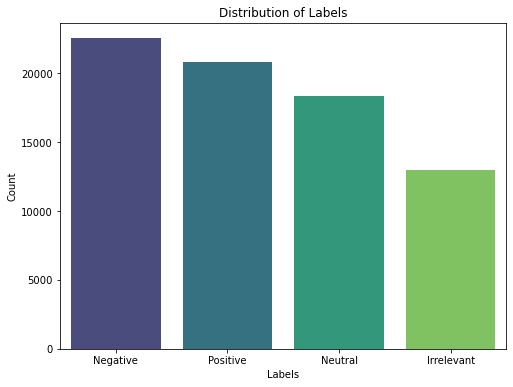

In [95]:
label_counts = train_data['Sentiment'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')
plt.title('Distribution of Labels')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.show()

we have morethan 20000 records with negative label and around 12000 records with irrelevant label. But in the objective we are asked to consider irrelevent to neutral.

Let's see if we have null values

In [96]:
train_data.isna().sum()

ID             0
Topic          0
Sentiment      0
Text         686
dtype: int64

The text is the data we have to analyse for sentiment. We have 686 rows missing, lets drop the missing data

In [97]:
train_data.dropna(inplace= True)

Let's drop duplicate rows from our dataset if there are any

In [98]:
#Deduplication of entries
final=train_data.drop_duplicates(subset=['ID', 'Topic', 'Sentiment', 'Text'], keep='first', inplace=False)
final.shape

(71655, 4)

The data size has been reduced to 71655 from 74000.

#   Text Preprocessing.

Now that we have finished deduplication our data requires some preprocessing before we go on further with analysis and making the prediction model.

Hence in the Preprocessing phase we do the following in the order below:-

1. Begin by removing the html tags if there are any.
2. Remove any punctuations or limited set of special characters like , or . or # etc.
3. Check if the word is made up of english letters and is not alpha-numeric
4. Check to see if the length of the word is greater than 2 (as it was researched that there is no adjective in 2-letters)
5. Convert the word to lowercase
6. Remove Stopwords
7. Finally Snowball Stemming the word (it was obsereved to be better than Porter Stemming)<br>

After which we collect the words used to describe positive and negative review

In [99]:
# printing some random reviews
sent_0 = train_data['Text'].values[0]
print(sent_0)
print("="*50)

sent_1000 = train_data['Text'].values[1000]
print(sent_1000)
print("="*50)

sent_1500 = train_data['Text'].values[1500]
print(sent_1500)
print("="*50)

sent_4900 = train_data['Text'].values[4900]
print(sent_4900)
print("="*50)

I am coming to the borders and I will kill you all,
@EpicGames on @2K why add crossplay for @Steam 3 if you weren't planning make everything compatible for console? What a waste
@ Ki11ersix @ dammit2h3ll @ Borderlands Given that I graduated, that's pretty ok for the time being, but nevertheless it can be said with certainty that I enjoyed some Borderlands in 2019 lol pic.twitter.com / EPXvhmeLH1
.. TAGLIA: F. PREZZO: [ EURO 2.tt/31MikSR 19]


We can see a lot of special characters and https links also. We need to remove that.

In [100]:
# remove urls from text python: https://stackoverflow.com/a/40823105/4084039
sent_0 = re.sub(r"http\S+", "", sent_0)
sent_1000 = re.sub(r"http\S+", "", sent_1000)
sent_150 = re.sub(r"http\S+", "", sent_1500)
sent_4900 = re.sub(r"http\S+", "", sent_4900)

print(sent_4900)

.. TAGLIA: F. PREZZO: [ EURO 2.tt/31MikSR 19]


In [101]:
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [102]:
decontracted(sent_4900)

'.. TAGLIA: F. PREZZO: [ EURO 2.tt/31MikSR 19]'

In [103]:
sent_4900 = re.sub("\S*\d\S*", "", sent_4900).strip()
print(sent_4900)

.. TAGLIA: F. PREZZO: [ EURO


In [104]:
sent_4900 = re.sub('[^A-Za-z0-9]+', ' ', sent_4900)
print(sent_4900)

 TAGLIA F PREZZO EURO


In [105]:
# # we are removing the words from the stop words list: 'no', 'nor', 'not'
# # we are including them into stop words list

# stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
#             "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
#             'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
#             'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
#             'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
#             'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
#             'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
#             'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
#             'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
#             'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
#             's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
#             've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
#             "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
#             "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
#             'won', "won't", 'wouldn', "wouldn't"])

In [106]:
stop_words = set(stopwords.words('english'))

In [107]:
preprocessed_tweets = []
for sentence in tqdm(train_data['Text'].values):
    sentence = re.sub(r"http\S+", "", sentence)
    sentence = BeautifulSoup(sentence, 'lxml').get_text()
    sentence = decontracted(sentence)
    sentence = re.sub("\S*\d\S*", "", sentence).strip()
    sentence = re.sub('[^A-Za-z]+', ' ', sentence)
    sentence = ' '.join(e.lower() for e in sentence.split() if e.lower() not in stop_words)
    preprocessed_tweets.append(sentence.strip())
# tweet_data['cleaned_text'] = preprocessed_tweets
# tweet_data[['Text', 'cleaned_text']].head()

  0%|                                                                                        | 0/73995 [00:00<?, ?it/s]C:\Users\shri\anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
100%|██████████████████████████████████████████████████████████████████████████| 73995/73995 [00:16<00:00, 4452.80it/s]


Let's have a look at our preprocessed text

In [108]:
preprocessed_tweets

['coming borders kill',
 'im getting borderlands kill',
 'im coming borderlands murder',
 'im getting borderlands murder',
 'im getting borderlands murder',
 'spent hours making something fun know huge borderlands fan maya one favorite characters decided make wallpaper pc original image versus creation made enjoy',
 'spent couple hours something fun know huge borderlands fan maya one favorite characters decided make wallpaper pc original picture compared creation made fun pic twitter com',
 'spent hours something fun know huge borderlands fan maya one favorite characters',
 'spent hours making something fun know huge rhandlerr fan maya one favorite characters decided make wallpaper pc original image versus creation made enjoy',
 'spent hours making something fun know huge rhandlerr fan maya one favorite characters decided make wallpaper pc original image versus creation made enjoy',
 '',
 'rock hard la varlope rare powerful handsome jackpot borderlands xbox dlvr rmtrgf',
 'rock hard la

In [109]:
train_data['Preprocessed_Text'] = preprocessed_tweets

In [110]:
train_data.head()

,ID,Topic,Sentiment,Text,Preprocessed_Text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,coming borders kill
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting borderlands kill
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming borderlands murder
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting borderlands murder
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,im getting borderlands murder


In [111]:
train_data['Sentiment'].value_counts()

Negative      22358
Positive      20654
Neutral       18108
Irrelevant    12875
Name: Sentiment, dtype: int64

Now lets featurise the the text and perform modelling

In [118]:
le_model = LabelEncoder()
train_data['Sentiment'] = le_model.fit_transform(train_data['Sentiment'])

In [119]:
train_data.head()

,ID,Topic,Sentiment,Text,Preprocessed_Text
0,2401,Borderlands,3,I am coming to the borders and I will kill you...,coming borders kill
1,2401,Borderlands,3,im getting on borderlands and i will kill you ...,im getting borderlands kill
2,2401,Borderlands,3,im coming on borderlands and i will murder you...,im coming borderlands murder
3,2401,Borderlands,3,im getting on borderlands 2 and i will murder ...,im getting borderlands murder
4,2401,Borderlands,3,im getting into borderlands and i can murder y...,im getting borderlands murder


For the vectorisation of the preprocessed text we are using Tfidf technique

In [120]:
# TF-IDF with n-grams (1-grams and 2-grams)
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))

# Fit and transform the cleaned text
X = tfidf.fit_transform(train_data['Preprocessed_Text'])



In [ ]:

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, train_data['Sentiment'], test_size=0.3, random_state=42)

Lets train a Logistic Regression model on top of our dataset

In [60]:
# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict sentiment on the test set
y_pred = model.predict(X_test)

# Display classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.52      0.59      3900
           1       0.72      0.76      0.74      6709
           2       0.67      0.60      0.64      5418
           3       0.64      0.76      0.69      6172

    accuracy                           0.68     22199
   macro avg       0.68      0.66      0.66     22199
weighted avg       0.68      0.68      0.68     22199



C:\Users\shri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


We can see that the Logistic regression is not working good lets try to train a MultinomialNB and a Random Forest to see how they are working

### MultinomialNB

In [61]:
nb_model = MultinomialNB()

# Train the model on the training data
nb_model.fit(X_train, y_train)

# Predict sentiment on the test set
y_pred_nb = nb_model.predict(X_test)

# Evaluate the MultinomialNB model
print("MultinomialNB Accuracy:", accuracy_score(y_test, y_pred_nb))
print("\nClassification Report for MultinomialNB:\n", classification_report(y_test, y_pred_nb))

MultinomialNB Accuracy: 0.6311545565115546

Classification Report for MultinomialNB:
               precision    recall  f1-score   support

           0       0.71      0.36      0.48      3900
           1       0.61      0.80      0.69      6709
           2       0.66      0.52      0.58      5418
           3       0.62      0.72      0.67      6172

    accuracy                           0.63     22199
   macro avg       0.65      0.60      0.60     22199
weighted avg       0.64      0.63      0.62     22199



Let's tweek something

In [40]:
param_grid_nb = {'alpha': [0.1, 0.5, 1, 2, 5]}

# Initialize GridSearchCV
grid_nb = GridSearchCV(MultinomialNB(), param_grid_nb, cv=5, scoring='accuracy')

# Fit the model
grid_nb.fit(X_train, y_train)

# Best parameters and best score
print("Best Alpha for Naive Bayes:", grid_nb.best_params_)
print("Best Cross-Validation Accuracy for Naive Bayes:", grid_nb.best_score_)

# Predict on test data with best parameters
y_pred_nb = grid_nb.best_estimator_.predict(X_test)
print("Test Accuracy for Naive Bayes:", accuracy_score(y_test, y_pred_nb))

Best Alpha for Naive Bayes: {'alpha': 0.1}
Best Cross-Validation Accuracy for Naive Bayes: 0.6350684127095942
Test Accuracy for Naive Bayes: 0.6408396774629488


### Random Forest

In [73]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Predict sentiment on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report for Random Forest:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.8660300013514122

Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.93      0.78      0.85      3900
           1       0.88      0.89      0.89      6709
           2       0.89      0.85      0.87      5418
           3       0.80      0.91      0.85      6172

    accuracy                           0.87     22199
   macro avg       0.88      0.86      0.86     22199
weighted avg       0.87      0.87      0.87     22199



In [43]:
# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize RandomizedSearchCV
random_rf = RandomizedSearchCV(RandomForestClassifier(), param_grid_rf, n_iter=20, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)

# Fit the model
random_rf.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters for Random Forest:", random_rf.best_params_)
print("Best Cross-Validation Accuracy for Random Forest:", random_rf.best_score_)

# Predict on test data with best parameters
y_pred_rf = random_rf.best_estimator_.predict(X_test)
print("Test Accuracy for Random Forest:", accuracy_score(y_test, y_pred_rf))


Best Parameters for Random Forest: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}
Best Cross-Validation Accuracy for Random Forest: 0.875936426683603
Test Accuracy for Random Forest: 0.8951304112797874


Lets now try to balance the dataset

In [130]:
balanced_train_data['Sentiment'].value_counts()

3    22358
2    22358
1    22358
0    22358
Name: Sentiment, dtype: int64

In [131]:
# Split the data
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_resampled_dense, balanced_train_data['Sentiment'], test_size=0.3, random_state=42)

In [132]:
# Initialize and train the logistic regression model
model1 = LogisticRegression()
model1.fit(X_train2, y_train2)

# Predict sentiment on the test set
y_pred2 = model.predict(X_test2)

# Display classification report
print(classification_report(y_test2, y_pred2))

C:\Users\shri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.80      0.56      0.66      6722
           1       0.70      0.79      0.74      6788
           2       0.72      0.64      0.68      6690
           3       0.61      0.79      0.69      6630

    accuracy                           0.70     26830
   macro avg       0.71      0.70      0.69     26830
weighted avg       0.71      0.70      0.69     26830



In [136]:
# Split the data
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_train_tfidf, train_data['Sentiment'], test_size=0.3, random_state=42)

In [138]:
# Initialize and train the logistic regression model
model2 = LogisticRegression(class_weight='balanced')
model2.fit(X_train3, y_train3)

# Predict sentiment on the test set
y_pred3 = model2.predict(X_test3)

# Display classification report
print(classification_report(y_test3, y_pred3))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      3900
           1       0.87      0.85      0.86      6709
           2       0.79      0.85      0.82      5418
           3       0.86      0.84      0.85      6172

    accuracy                           0.85     22199
   macro avg       0.85      0.85      0.85     22199
weighted avg       0.85      0.85      0.85     22199



C:\Users\shri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
